In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
file_path = 'P:/Teja/CompleteDataExample_OperationsFor20232024.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
data.head()

,PATIENT,TEAM LEAD,1ST OPERATOR,2ND OPERATOR,CV SURGEON,COMPLICATION,OPERATIVE MORTALITY,MORBIDITY & MORTALITY,STROKE,RENAL FAILURE,...,HEMATOCRIT,WBC COUNT,PLATELET COUNT,COMORBIDITY,VASCULAR RF,NYHA CLASS,EF,CAD,VALVE DISEASE,PREVIOUS PCI
0,1,NaN,ALMANFI,NaN,CHAUGLE,NaN,1.293,7.635,1.174,0.567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,ALMANFI,NaN,CHAUGLE,NaN,1.317,9.336,1.520,1.566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,ALMANFI,BEN,CHAUGLE,NaN,3.574,16.731,2.169,4.350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,DHARMA,S PATEL,CHAUGLE,NaN,3.058,18.939,1.287,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,DHARMA,S PATEL,CHAUGLE,NaN,1.501,9.236,1.248,1.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocessing

In [3]:
# Target Variable: Stroke
# Replace NaN in 'STROKE' column with a new binary column for prediction
data['STROKE'] = data['STROKE'].apply(lambda x: 1 if x >= 1 else 0 if pd.notna(x) else np.nan)


Missing Value Implementation

In [5]:
from sklearn.impute import SimpleImputer
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
# Step 1: Impute missing values for numerical features
num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = pd.DataFrame(
    num_imputer.fit_transform(data[num_cols]),
    columns=num_cols
)

# Step 2: Impute missing values for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = pd.DataFrame(
    cat_imputer.fit_transform(data[cat_cols]),
    columns=cat_cols
)

# Step 3: Impute missing values for the target column (STROKE)
stroke_imputer = SimpleImputer(strategy='most_frequent')
data['STROKE'] = stroke_imputer.fit_transform(data[['STROKE']])

# Step 4: Check for remaining missing values
missing_summary = data.isnull().sum()
if missing_summary.sum() > 0:
    print("Missing values still exist in the dataset:")
    print(missing_summary[missing_summary > 0])
else:
    print("All missing values have been successfully handled.")


All missing values have been successfully handled.


Normalization

In [7]:
# Step 3: Normalize/Scale numerical data
scaler = StandardScaler()



Categorical Encoding

In [9]:
# Ensure all categorical columns are converted to string type
for col in cat_cols:
    data[col] = data[col].astype(str)

# Impute missing values for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# Convert categorical columns to strings again (in case of numeric imputation)
for col in cat_cols:
    data[col] = data[col].astype(str)

# Proceed with encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(data[cat_cols])

print("OneHotEncoder successfully applied to categorical columns.")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', scaler)]), num_cols),
        ('cat', Pipeline(steps=[('imputer', cat_imputer), ('encoder', encoder)]), cat_cols)
    ]
)

OneHotEncoder successfully applied to categorical columns.


In [10]:
X = data[num_cols + cat_cols]
y = data['STROKE']

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Handle Column Names
cat_encoded_cols = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
processed_columns = num_cols + list(cat_encoded_cols)

# Ensure data dimensions match
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray() if hasattr(X_preprocessed, 'toarray') else X_preprocessed,
                                 columns=processed_columns)

# Save preprocessed data for modeling
X_preprocessed_df['STROKE'] = y.values
# Define the save path with the file name
target_path = r"C:\Users\Chaitanya Sai\Downloads\preprocessed_data_stroke.csv"

# Save the preprocessed data
X_preprocessed_df.to_csv(target_path, index=False)

print(f"File saved successfully at: {target_path}")

print("Preprocessing completed! Preprocessed data saved to 'preprocessed_data_stroke.csv'")

File saved successfully at: C:\Users\Chaitanya Sai\Downloads\preprocessed_data_stroke.csv
Preprocessing completed! Preprocessed data saved to 'preprocessed_data_stroke.csv'


EDA(Visualizations and Feature Selection)

1. Visualization (Did three)

Unique values in 'STROKE':
[1.   0.   0.78]

Value counts in 'STROKE':
STROKE
1.00    78
0.00    22
0.78     9
Name: count, dtype: int64

Unique values in 'STROKE' after cleaning:
[1. 0.]


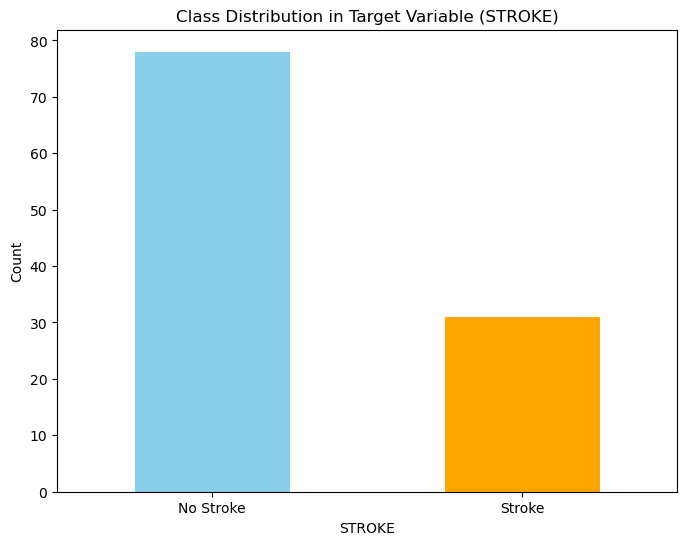

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Diagnose the issue
# Check unique values in the 'STROKE' column
print("Unique values in 'STROKE':")
print(data['STROKE'].unique())

# Check the value counts for each category
print("\nValue counts in 'STROKE':")
print(data['STROKE'].value_counts(dropna=False))

# Step 2: Handle unexpected or missing values
# Replace NaN or unexpected values in 'STROKE'
data['STROKE'] = data['STROKE'].fillna(0)  # Replace NaN with 0
data['STROKE'] = data['STROKE'].apply(lambda x: 0 if x not in [0, 1] else x)  # Keep only 0 and 1

# Step 3: Recheck unique values after cleaning
print("\nUnique values in 'STROKE' after cleaning:")
print(data['STROKE'].unique())

# Step 4: Re-plot the bar chart
plt.figure(figsize=(8, 6))
data['STROKE'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Target Variable (STROKE)')
plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)
plt.ylabel('Count')
plt.show()


C:\Users\Chaitanya Sai\AppData\Local\Temp\ipykernel_18476\3755108947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['STROKE'], y=data['AGE'], palette=['skyblue', 'orange'])


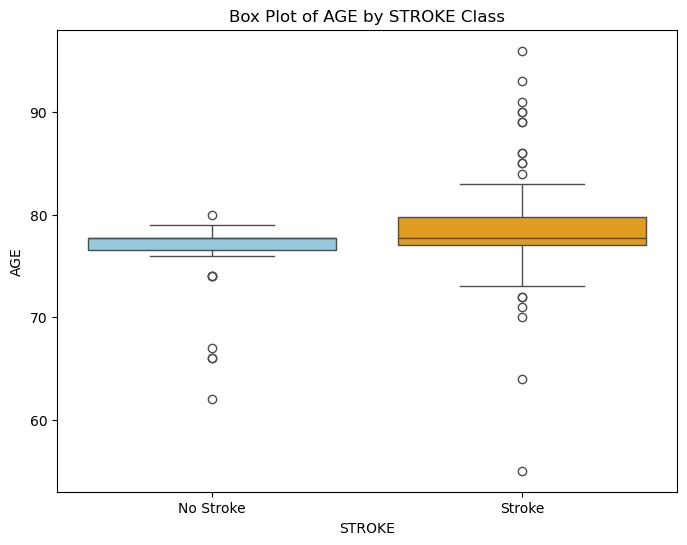

In [14]:
# Box plot for AGE by target variable STROKE
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['STROKE'], y=data['AGE'], palette=['skyblue', 'orange'])
plt.title('Box Plot of AGE by STROKE Class')
plt.xlabel('STROKE')
plt.ylabel('AGE')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


SEX
F    79
M    30
Name: count, dtype: int64


C:\Users\Chaitanya Sai\AppData\Local\Temp\ipykernel_18476\1163024504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=data, palette='viridis')


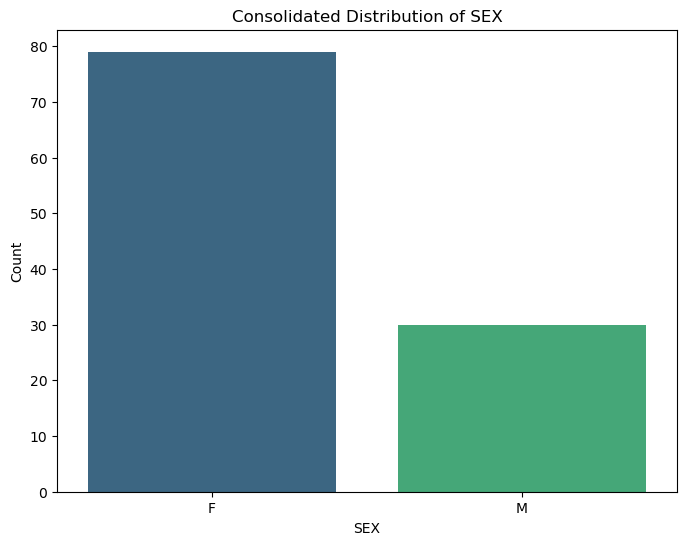

In [15]:
#Count Plots for Categorical Features
data['SEX'] = data['SEX'].replace({'Male': 'M', 'Female': 'F'})

# Check the updated counts
print(data['SEX'].value_counts())

# Plot the updated distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', data=data, palette='viridis')
plt.title('Consolidated Distribution of SEX')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()


Feature Selection(Removed higly correlated columns)

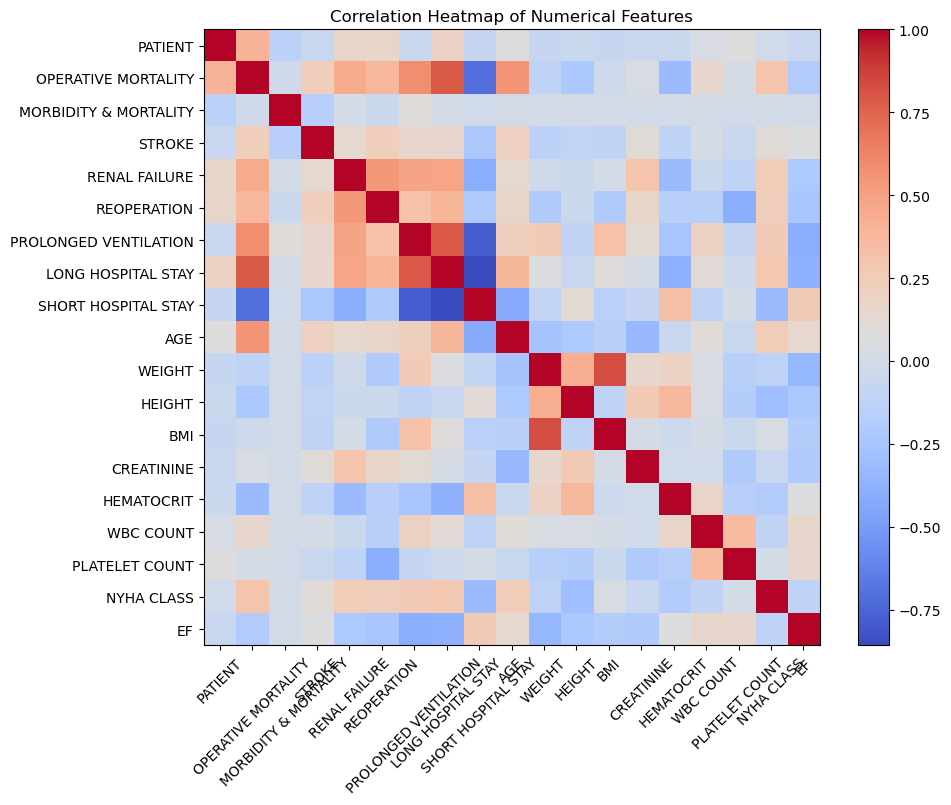

In [17]:
#Correlation Feature Selection
import matplotlib.pyplot as plt
import pandas as pd
# Check correlations (for numerical features only)
correlation_matrix = X_preprocessed_df.corr()
corr = data[num_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [18]:
# Before removing highly correlated columns
print("Dataset Shape (Rows, Columns):", data.shape)

# Display the number of rows and columns separately
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])


Dataset Shape (Rows, Columns): (109, 32)
Number of Rows: 109
Number of Columns: 32


In [19]:
import numpy as np

# Step 1: Filter numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Step 2: Handle missing or invalid values
numerical_data = numerical_data.fillna(numerical_data.mean())

# Step 3: Calculate the correlation matrix
correlation_threshold = 0.8  # Set the threshold for high correlation
correlation_matrix = numerical_data.corr()

# Step 4: Identify highly correlated columns
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

print("Columns to be dropped due to high correlation:")
print(columns_to_drop)

# Step 5: Drop the highly correlated columns
data = data.drop(columns=columns_to_drop)
data.head()


Columns to be dropped due to high correlation:
{'BMI', 'SHORT HOSPITAL STAY'}


,PATIENT,TEAM LEAD,1ST OPERATOR,2ND OPERATOR,CV SURGEON,COMPLICATION,OPERATIVE MORTALITY,MORBIDITY & MORTALITY,STROKE,RENAL FAILURE,...,HEMATOCRIT,WBC COUNT,PLATELET COUNT,COMORBIDITY,VASCULAR RF,NYHA CLASS,EF,CAD,VALVE DISEASE,PREVIOUS PCI
0,1.0,S PATEL,ALMANFI,S PATEL,CHAUGLE,PPM,1.293,7.635,1.0,0.567,...,38.405455,7.912727,234072.727273,"DIABETES, HYPERTENSION",PAD,2.38,52.943396,STABLE ANGINA,AS,N
1,2.0,S PATEL,ALMANFI,S PATEL,CHAUGLE,PPM,1.317,9.336,1.0,1.566,...,38.405455,7.912727,234072.727273,"DIABETES, HYPERTENSION",PAD,2.38,52.943396,STABLE ANGINA,AS,N
2,3.0,S PATEL,ALMANFI,BEN,CHAUGLE,PPM,3.574,16.731,1.0,4.350,...,38.405455,7.912727,234072.727273,"DIABETES, HYPERTENSION",PAD,2.38,52.943396,STABLE ANGINA,AS,N
3,4.0,S PATEL,DHARMA,S PATEL,CHAUGLE,PPM,3.058,18.939,1.0,4.301,...,38.405455,7.912727,234072.727273,"DIABETES, HYPERTENSION",PAD,2.38,52.943396,STABLE ANGINA,AS,N
4,5.0,S PATEL,DHARMA,S PATEL,CHAUGLE,PPM,1.501,9.236,1.0,1.026,...,38.405455,7.912727,234072.727273,"DIABETES, HYPERTENSION",PAD,2.38,52.943396,STABLE ANGINA,AS,N


In [20]:
# After removing highly correlated columns
print("Dataset Shape (Rows, Columns):", data.shape)

# Display the number of rows and columns separately
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])


Dataset Shape (Rows, Columns): (109, 30)
Number of Rows: 109
Number of Columns: 30


SPlitting the data(Test and Train data)

In [22]:
from sklearn.model_selection import train_test_split

X = X_preprocessed_df.drop(columns=['STROKE'])
y = X_preprocessed_df['STROKE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training and testing sets created.")


Training and testing sets created.


In [50]:
def preprocess_target(y, threshold=0.5):
    """Convert target variable to binary and handle missing values."""
    y = y.fillna(0)  # Replace NaN with 0
    y = y.apply(lambda x: 1 if x >= threshold else 0)  # Binarize target
    return y

# Example usage
y = preprocess_target(y)


Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")


Accuracy: 0.6818

Confusion Matrix:
[[ 0  4]
 [ 3 15]]

AUC-ROC Score: 0.7222


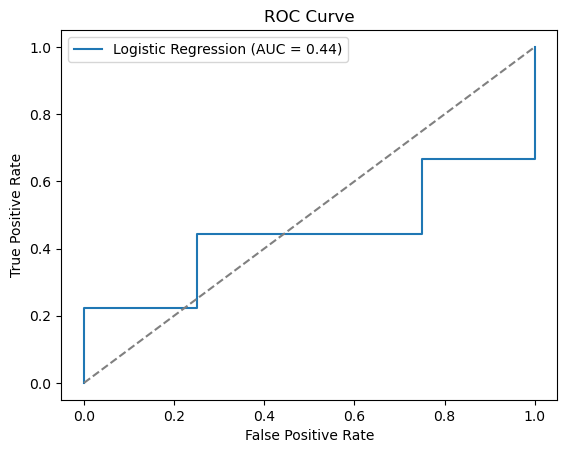

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


XGBoost

In [65]:


import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of trees
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns
    random_state=42,
    use_label_encoder=False  # Disable unnecessary label encoder warning
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")


C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:18] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7273

Confusion Matrix:
[[ 0  4]
 [ 2 16]]

AUC-ROC Score: 0.4444


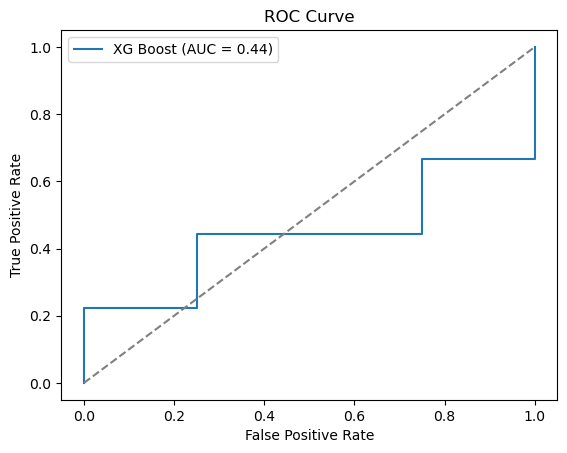

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"XG Boost (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of each tree (None means no limit)
    min_samples_split=2,    # Minimum samples to split a node
    min_samples_leaf=1,     # Minimum samples at a leaf node
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")


Accuracy: 0.7727

Confusion Matrix:
[[ 0  4]
 [ 1 17]]

AUC-ROC Score: 0.7778


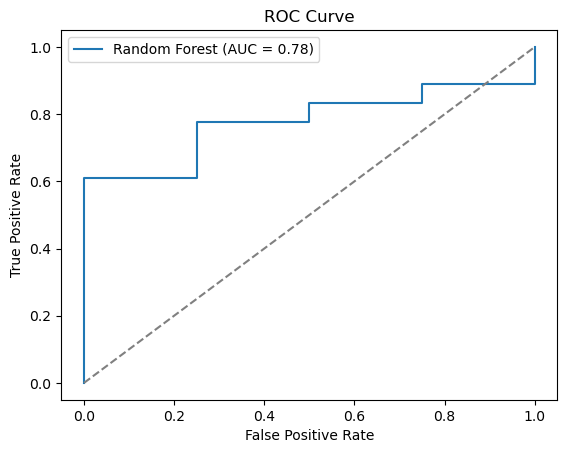

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Comparative Analysis(Handled Class Imblance using threshold tuning and cross validation)

In [74]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
custom_threshold = 0.3  # Define the threshold to adjust

# Comparative analysis with cross-validation
comparative_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name} with Cross-Validation...")
    
    # Cross-validated predictions
    y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    y_pred_threshold = (y_prob >= custom_threshold).astype(int)  # Apply custom threshold
    
    # Metrics
    accuracy = accuracy_score(y, y_pred_threshold)
    auc = roc_auc_score(y, y_prob)
    precision = precision_score(y, y_pred_threshold, zero_division=0)
    recall = recall_score(y, y_pred_threshold)
    f1 = f1_score(y, y_pred_threshold)
    
    # Store the results
    comparative_results[model_name] = {
        "Accuracy": accuracy,
        "AUC-ROC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Create a DataFrame for comparison
comparative_df = pd.DataFrame(comparative_results).T

# Decide best model based on all metrics with equal weight
metric_weights = {
    'Accuracy': 0.2,
    'AUC-ROC': 0.2,
    'Precision': 0.2,
    'Recall': 0.2,
    'F1-Score': 0.2
}

# Initialize best model variables
best_model_name = None
best_combined_score = -1

# Calculate combined scores for models
for model_name, row in comparative_df.iterrows():
    combined_score = sum(row[metric] * weight for metric, weight in metric_weights.items())
    if combined_score > best_combined_score:
        best_combined_score = combined_score
        best_model_name = model_name

# Get specific metric values for the best model
best_model_metrics = comparative_df.loc[best_model_name]

# Print the results
print("\nComparative Analysis of Models with Cross-Validation:")
print(comparative_df)
print(f"\nBest Model Based on All Metrics: {best_model_name} with Combined Score: {best_combined_score:.4f}")
print("\nDetailed Metrics for Best Model:")
print(best_model_metrics)




Evaluating Logistic Regression with Cross-Validation...
Evaluating Random Forest with Cross-Validation...
Evaluating XGBoost with Cross-Validation...


C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:32] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:32] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:32] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:33] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Softwares\Anaconda\Lib\site-packa


Comparative Analysis of Models with Cross-Validation:
                     Accuracy   AUC-ROC  Precision    Recall  F1-Score
Logistic Regression  0.779817  0.694880   0.794393  0.977011  0.876289
Random Forest        0.798165  0.693835   0.798165  1.000000  0.887755
XGBoost              0.788991  0.631661   0.813725  0.954023  0.878307

Best Model Based on All Metrics: Random Forest with Combined Score: 0.8356

Detailed Metrics for Best Model:
Accuracy     0.798165
AUC-ROC      0.693835
Precision    0.798165
Recall       1.000000
F1-Score     0.887755
Name: Random Forest, dtype: float64


Comparsion of Model metrics and ROC curve

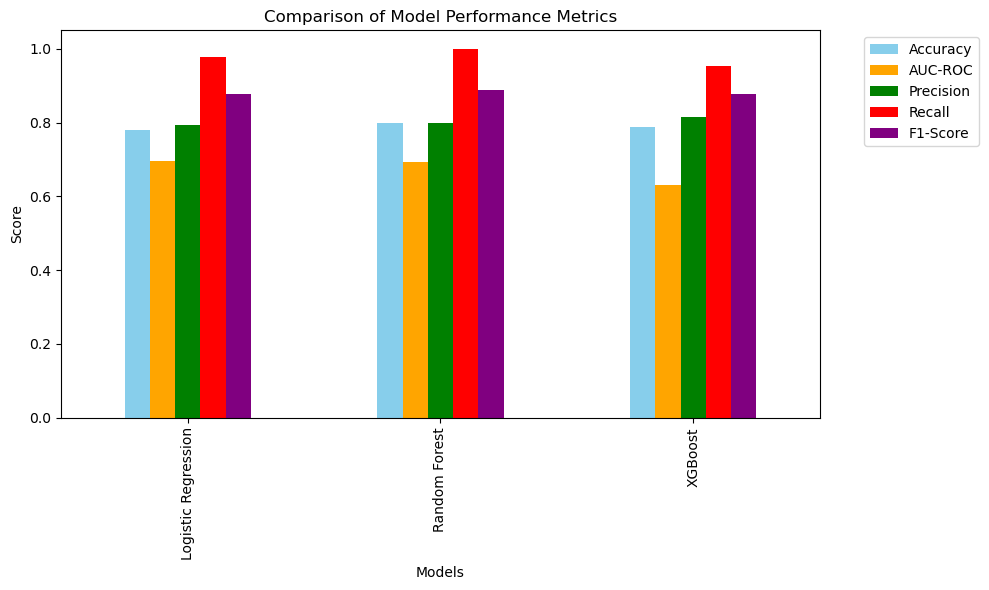

In [77]:
# Plot metrics comparison
comparative_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:49:38] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


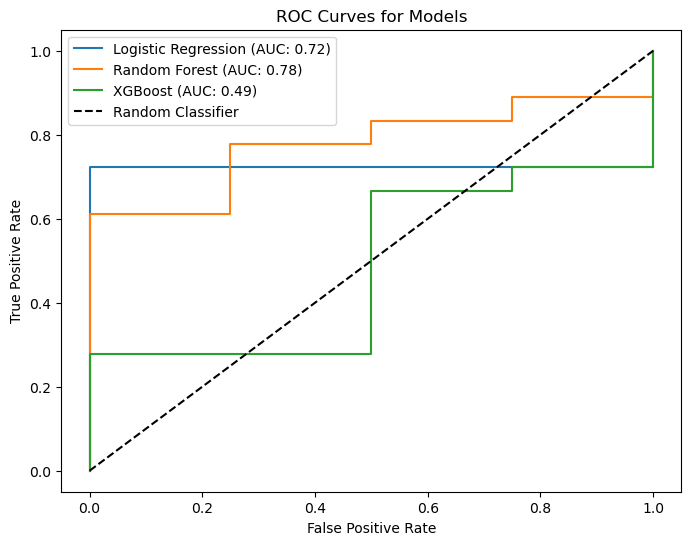

In [79]:
from sklearn.metrics import roc_curve, RocCurveDisplay

plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
